# Is Voting Turnout Decreasing? 
## An analysis of the Italian Elections throughout the years. 
---
---
In this research I analysed the Italian General Elections and their respective turnout. My aim is to understand and verify if the current trend of low electoral participation can be appreciated on a larger scale in the past and in the future, researching the causes of this issue and the possible solutions.

## Context and Topic

### Italian General Elections 
The general elections determine the composition of the Italian Parliament. They are held every five year at maximum or before in case of early dissolution. Similar to the English bicameralism, the Italian Parliament is made up of two Chambers, the Senate and the Chamber of Deputies whose members are elected through these general elections. ("Italian general elections", 2023)

### Voter Eligibility 

The minimum requirement to vote is to be 18 years or over on the day of the Elections. Voting privileges can be revoked in peculiar cases. Hence, the turnout percentages shown later in this analysis are calculated on the basis of the eligible population. 

### Note

To have a clearer and more transparent view of the analysis, I will remove the turnout levels in General Elections held during the monarchical period, considering only elections held on and after the day of the Republic-Monarchy Referendum and the elections of the Constituent Assembly (i.e., the authors of the Italian Constitution), the 2nd of June 1946.

---
# Methods of Research
1. From the MediaWiki API, I retrieve all results from the query 'italian elections'.

In [10]:
import requests
import json
import pandas as pd

search_query='italian elections'
number_of_results=50
endpoint='search/page'
base_url='https://en.wikipedia.org/w/rest.php/v1/'

url = base_url + endpoint
response = requests.get(url, params={'q': search_query, 'limit': number_of_results})
response = json.loads(response.text)

page_url = []
for page in response['pages']:
  page_url.append('https://en.wikipedia.org/wiki/' + page['key'])

page_titles = []
for page in response['pages']:
  page_titles.append(page['title'])

page_description = []
for page in response['pages']:
  page_description.append(page['description'])


page_image = []
for page in response['pages']:
  try:
    page_image.append('https:' + page['thumbnail']['url'])
  except:
    page_image.append('https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/200px-Wikipedia-logo-v2.svg.png')



df_wiki_search = pd.DataFrame({'page_title': page_titles, 'page_description': page_description, 'page_image': page_image, 'page_url': page_url})
df_wiki_search

,page_title,page_description,page_image,page_url
0,Elections in Italy,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/Elections_in_Italy
1,1948 Italian general election,Italian election,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/1948_Italian_gen...
2,2018 Italian general election,Election in Italy,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/2018_Italian_gen...
3,2022 Italian general election,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/2022_Italian_gen...
4,Next Italian general election,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/Next_Italian_gen...
5,1994 Italian general election,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/1994_Italian_gen...
6,1976 Italian general election,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/1976_Italian_gen...
7,1987 Italian general election,None,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/1987_Italian_gen...
8,2006 Italian general election,15th election of the Italian Republic Parliament,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/2006_Italian_gen...
9,Brothers of Italy,Italian political party,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/Brothers_of_Italy


2. Created a nested list with all the links for each page

    _In technical terms_: 
    - Created a function that scrapes the page and gets all the links in _href_
    - I noticed that all links were in the form _/wiki/..._ so I attached these parts to the initial section of the links (_https://en.wikipedia.org_)
    - The df_wiki_links dataframe contains the title, the url and all the links present in that page

In [11]:
from bs4 import BeautifulSoup

data = []
for page in response['pages']:
    page_title = page['title']
    page_url = 'https://en.wikipedia.org/wiki/' + page['key']
    page_links = []

    # Fetch all links on the page
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for link in soup.find_all('a'):
        href = link.get('href')
        if href is not None and href.startswith('/wiki/'):
            page_links.append('https://en.wikipedia.org' + href)

    # Append the data to the list
    data.append({'Title': page_title, 'URL': page_url, 'Links': page_links})

# Create the dataframe
df_wiki_links = pd.DataFrame(data)
df_wiki_links

,Title,URL,Links
0,Elections in Italy,https://en.wikipedia.org/wiki/Elections_in_Italy,"[https://en.wikipedia.org/wiki/Main_Page, http..."
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
2,2018 Italian general election,https://en.wikipedia.org/wiki/2018_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
3,2022 Italian general election,https://en.wikipedia.org/wiki/2022_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
4,Next Italian general election,https://en.wikipedia.org/wiki/Next_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
8,2006 Italian general election,https://en.wikipedia.org/wiki/2006_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
9,Brothers of Italy,https://en.wikipedia.org/wiki/Brothers_of_Italy,"[https://en.wikipedia.org/wiki/Main_Page, http..."


3. Filter and keep only the Election Pages 

    _In technical terms_: I searched the pages with the following pattern YEAR (4 numbers) + 'Italian general election' and filtered for the pages present in that list.

In [12]:
# Gather only the tiles of the pages in page_titles that follow the pattern Year Italian general election
import re
pattern = r"^\d{4} Italian general election"
useful_pages = []
for page in page_titles:
    if re.search(pattern, page):
        useful_pages.append(page)

df_wiki_links = df_wiki_links[df_wiki_links['Title'].isin(useful_pages)]
df_wiki_links

,Title,URL,Links
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
2,2018 Italian general election,https://en.wikipedia.org/wiki/2018_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
3,2022 Italian general election,https://en.wikipedia.org/wiki/2022_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
8,2006 Italian general election,https://en.wikipedia.org/wiki/2006_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
12,2013 Italian general election,https://en.wikipedia.org/wiki/2013_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
13,2008 Italian general election,https://en.wikipedia.org/wiki/2008_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."
15,1996 Italian general election,https://en.wikipedia.org/wiki/1996_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http..."


4. Creation and application of "get_turnout_level()" formula that retrieves turnout percentages for each page.

In [13]:
import requests

# Transfor this into a formula
def get_turnout_level(link):
    response = requests.get(link)
    html_content = response.content

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # find all td elements with class infobox-data
    td_elements = soup.find_all('td', class_='infobox-data')

    for td in td_elements:
        # check if the text contains '%'
        if '%' in td.text:
            # split the text by whitespace
            parts = td.text.split()
            # iterate over the parts to find the one that contains '%'
            for part in parts:
                if '%' in part:
                    # remove the '%' character and convert the string to a float
                    percentage = float(part.strip('%'))
                    return percentage
get_turnout_level('https://en.wikipedia.org/wiki/2006_Italian_general_election') # To check if the function works


83.6

In [14]:
# Apply the formula to the dataframe
df_wiki_links['Turnout'] = df_wiki_links['URL'].apply(get_turnout_level)
df_wiki_links #Turnout is the percentage of people who voted

/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_14157/3111164592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki_links['Turnout'] = df_wiki_links['URL'].apply(get_turnout_level)


,Title,URL,Links,Turnout
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.20
2,2018 Italian general election,https://en.wikipedia.org/wiki/2018_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",72.90
3,2022 Italian general election,https://en.wikipedia.org/wiki/2022_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",63.80
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",86.30
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.40
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.80
8,2006 Italian general election,https://en.wikipedia.org/wiki/2006_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",83.60
12,2013 Italian general election,https://en.wikipedia.org/wiki/2013_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",75.20
13,2008 Italian general election,https://en.wikipedia.org/wiki/2008_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",80.50
15,1996 Italian general election,https://en.wikipedia.org/wiki/1996_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",82.90


5. Getting the date of the elections

    _In technical terms_: 
    - For easier reference, I have scraped the websites and got only the second day of the election. This allowed me to produce a cleaner output
    - Transformed to date time the string text
    - Created a new column


In [15]:
# Formula for getting the date of the election
def get_date(link):
    response = requests.get(link)
    html_content = response.content

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    try:
        td = soup.find('td', style='text-align:center; vertical-align:middle;; padding:0 1px;width:60%;').get_text()

        #get the number before the "–"
        if '–' in td:
            day = td.split('–')[1] # for easier reading, I will consider the second day of the election
            day=pd.to_datetime(day)
        elif '(' in td: # This is an issue raised with the 1948 election as the date format was different than the others
            day = td.split('(')[0]
            day=pd.to_datetime(day)
        else:
            #convert to timeseries
            day = pd.to_datetime(td)
    except:
        day = 'None'
    return day
# Apply the formula to the dataframe
df_wiki_links['Date'] = df_wiki_links['URL'].apply(get_date)
df_wiki_links


/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_14157/4127585829.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wiki_links['Date'] = df_wiki_links['URL'].apply(get_date)


,Title,URL,Links,Turnout,Date
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.20,1948-04-18
2,2018 Italian general election,https://en.wikipedia.org/wiki/2018_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",72.90,2018-03-04
3,2022 Italian general election,https://en.wikipedia.org/wiki/2022_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",63.80,2022-09-25
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",86.30,1994-03-28
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.40,1976-06-20
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.80,1987-06-15
8,2006 Italian general election,https://en.wikipedia.org/wiki/2006_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",83.60,2006-04-10
12,2013 Italian general election,https://en.wikipedia.org/wiki/2013_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",75.20,2013-02-25
13,2008 Italian general election,https://en.wikipedia.org/wiki/2008_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",80.50,2008-04-14
15,1996 Italian general election,https://en.wikipedia.org/wiki/1996_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",82.90,1996-04-21


6. Kept only the election held on or after the 2nd of June 1946

In [16]:
# Keep only the rows that are after 1946-06-02 and sort the dataframe by date

date = pd.to_datetime("1946, 2 June")
df_wiki_links = df_wiki_links[df_wiki_links['Date'] > date]
df_wiki_links = df_wiki_links.sort_values(by='Date')
df_wiki_links

,Title,URL,Links,Turnout,Date
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.2,1948-04-18
33,1963 Italian general election,https://en.wikipedia.org/wiki/1963_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.9,1963-04-28
17,1968 Italian general election,https://en.wikipedia.org/wiki/1968_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.8,1968-05-19
38,1972 Italian general election,https://en.wikipedia.org/wiki/1972_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.2,1972-05-07
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.4,1976-06-20
34,1979 Italian general election,https://en.wikipedia.org/wiki/1979_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",90.6,1979-06-03
16,1983 Italian general election,https://en.wikipedia.org/wiki/1983_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.0,1983-06-26
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.8,1987-06-15
23,1992 Italian general election,https://en.wikipedia.org/wiki/1992_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",87.4,1992-04-06
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",86.3,1994-03-28


7. Plot out the results

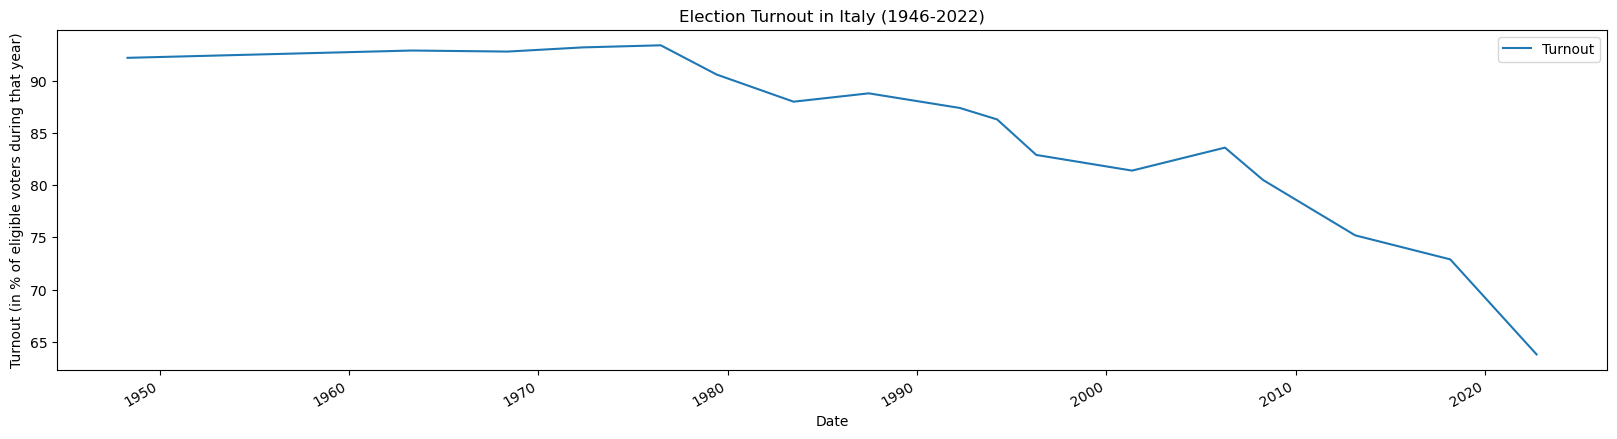

In [17]:
# Plot the turnout as a line chart and show the labels
import matplotlib.pyplot as plt

# Plot the turnout as a line chart and show the labels
df_wiki_links.plot(x='Date', y='Turnout', kind='line', figsize=(20, 5))

# Set the chart title and axis labels
plt.title('Election Turnout in Italy (1946-2022)')
plt.xlabel('Date')
plt.ylabel('Turnout (in % of eligible voters during that year)')

# Show the chart
plt.show()


The graph clearly shows a decline in the turnout levels in Italy, particularly sharp during the last two decades. The level during the 2022 elections (65%) was the lowest ever recorded in Italy. The percentage of people that did not vote could have made a significant difference to the elections' results. In the next steps, an attempt of forecast will be made. Before that I will calculate the mean of turnout and the average years between two elections (given that in most cases the 5-year mandate finishes early).

In [18]:
# Add a column with the difference in time between the current election and the previous one
df_wiki_links['Time Difference'] = df_wiki_links['Date'].diff()
df_wiki_links

,Title,URL,Links,Turnout,Date,Time Difference
1,1948 Italian general election,https://en.wikipedia.org/wiki/1948_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.2,1948-04-18,NaT
33,1963 Italian general election,https://en.wikipedia.org/wiki/1963_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.9,1963-04-28,5488 days
17,1968 Italian general election,https://en.wikipedia.org/wiki/1968_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",92.8,1968-05-19,1848 days
38,1972 Italian general election,https://en.wikipedia.org/wiki/1972_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.2,1972-05-07,1449 days
6,1976 Italian general election,https://en.wikipedia.org/wiki/1976_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",93.4,1976-06-20,1505 days
34,1979 Italian general election,https://en.wikipedia.org/wiki/1979_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",90.6,1979-06-03,1078 days
16,1983 Italian general election,https://en.wikipedia.org/wiki/1983_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.0,1983-06-26,1484 days
7,1987 Italian general election,https://en.wikipedia.org/wiki/1987_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",88.8,1987-06-15,1450 days
23,1992 Italian general election,https://en.wikipedia.org/wiki/1992_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",87.4,1992-04-06,1757 days
5,1994 Italian general election,https://en.wikipedia.org/wiki/1994_Italian_gen...,"[https://en.wikipedia.org/wiki/Main_Page, http...",86.3,1994-03-28,721 days


In [19]:
# Calculate the average time between elections and the average turnout
average_time = df_wiki_links['Time Difference'].mean()
average_turnout = df_wiki_links['Turnout'].mean()
# Convert average_time to a number of years
average_time = average_time.days / 365
print('Average time between elections: {:.2f} years'.format(average_time))
print('Average turnout: {:.2f}%'.format(average_turnout))


Average time between elections: 4.65 years
Average turnout: 85.05%


In [20]:
# Calculate the difference between the current turnout and the past turnout
df_wiki_links['Trend'] = df_wiki_links['Turnout'].diff()
#Print 'The average trend for turnout is of ' df_wiki_links['Trend'].mean().round(2) '% per election.'
print('The average trend for turnout is of ' + str(df_wiki_links['Trend'].mean().round(2)) + '% per election.')


The average trend for turnout is of -1.78% per election.


8. *Forecast*. I will make use of the "Prophet" library from Meta. This library should provide a rational prevision of the next elections.
_In technical terms:_ 
    - The prophet library only takes a df with the year column as 'ds' and the vale column as 'y'

In [21]:
# Create a new dataframe containing only the turnout level as 's' and date as 'ds'
df_forecast = df_wiki_links[['Turnout', 'Date']]
df_forecast = df_forecast.rename(columns={'Turnout': 'y', 'Date': 'ds'})
#place y after ds
df_forecast = df_forecast[['ds', 'y']]
#transform y into integer
df_forecast['y'] = df_forecast['y'].astype(int)
# Extract only the year from the date as an integer
df_forecast['ds'] = df_forecast['ds'].dt.year
df_forecast.reset_index(inplace=True)
#remove the index column
df_forecast = df_forecast.drop(columns=['index'])
df_forecast


,ds,y
0,1948,92
1,1963,92
2,1968,92
3,1972,93
4,1976,93
5,1979,90
6,1983,88
7,1987,88
8,1992,87
9,1994,86


**PLEASE NOTE**: To correctly visualise the following output, make sure to have prophet library correctly installed: follow this [link](https://facebook.github.io/prophet/docs/installation.html#:~:text=Installation%20in-,Python,-Prophet%20is%20on) for instructions, or open this file on Google Colab.

14:47:26 - cmdstanpy - INFO - Chain [1] start processing
14:47:27 - cmdstanpy - INFO - Chain [1] done processing


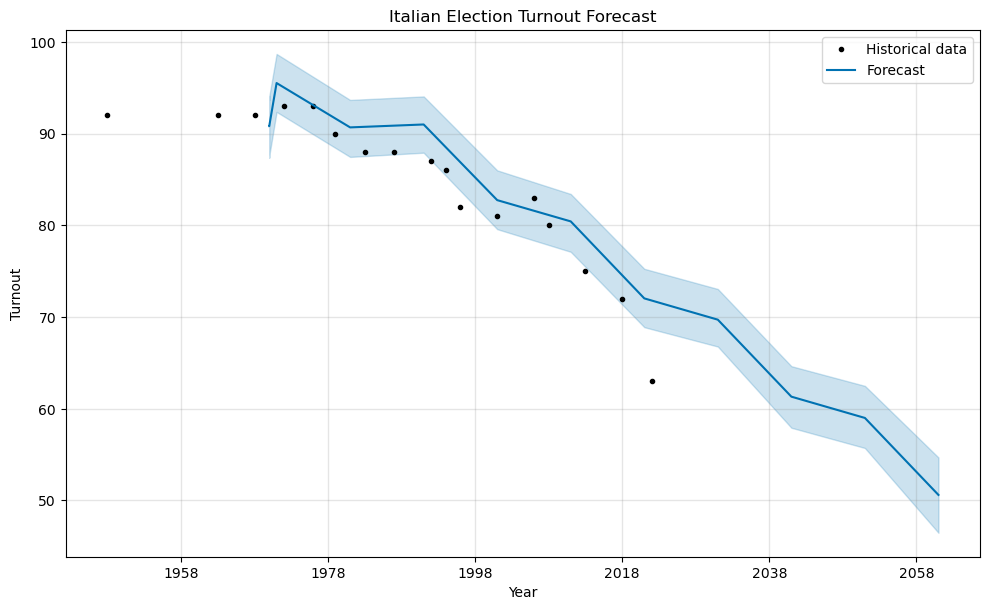

In [22]:
import matplotlib.pyplot as plt
from prophet import Prophet



# Create a Prophet model and train it on the training data
model = Prophet()
model.fit(df_forecast)

# Use the model to predict the turnout levels for the next 10 years
future_years = model.make_future_dataframe(periods=10, freq='10Y')
predicted_turnouts = model.predict(future_years)

# Plot the predicted turnout levels
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predicted_turnouts, ax=ax)
plt.xlabel('Year')
plt.ylabel('Turnout')
plt.title('Italian Election Turnout Forecast')
plt.legend(['Historical data', 'Forecast'])
plt.show()


The prophet forecast returns a generally clear decreasing trend for the turnout. However, this element is extremely linked to the single candidate's ability to encourage the population to vote; therefore I argue that it is extremely difficult to show a rational prediction of the next elections. However, I believe that if citizens that voted for the current winning party are unsatisfied with their office, they will be unlikely to turn out for the next election. The main point here is that citizens do not feel represented by any of the candidates or they believe that any of them will have the impact that they desire to improve Italian society.

Lastly, when making a forecast on elections turnout, more unquantifiable data should be collected such as:
- Were the proposals reasonable and in the interests of society?
- Has the gender or origin of the canditates affected the turnout? Will it be a factor in the next elections?

# The Causes

In [this](https://www.thelocal.it/20220617/interview-whats-driving-the-decline-in-italian-voter-turnout/) article by The Local, the author interviews an Italian professor of political science and asks him which may be the causes of low turnout.

1. Indifference and dissatisfaction,
2. Protest and radicalisation, 
3. 'Physiological’ reasons leading to involuntary abstention (e.g., advanced age or illness making it difficult to reach the voting booth, or living in a town other than the one you’re officially resident in).

# The Possible Solutions

It seems that this issue does not regard solely the Italian Republic but it tends to be widely spread globally in democracies. Various experiments tried to find an effective solution as shown here.

In [23]:
from IPython.display import Image
search_query='Voter Turnout'
number_of_results=1
endpoint='search/page'
base_url='https://en.wikipedia.org/w/rest.php/v1/'

url = base_url + endpoint
response = requests.get(url, params={'q': search_query, 'limit': number_of_results})
response = json.loads(response.text)

page_url = []
for page in response['pages']:
  page_url.append('https://en.wikipedia.org/wiki/' + page['key'])

page_titles = []
for page in response['pages']:
  page_titles.append(page['title'])

page_description = []
for page in response['pages']:
  page_description.append(page['description'])

print(response['pages'][0]['title'])
print(response['pages'][0]['description'])
url='https://en.wikipedia.org/wiki/' + response['pages'][0]['key']
print(url)

Voter turnout
Percentage of a country's eligible voters who actually vote within elections
https://en.wikipedia.org/wiki/Voter_turnout


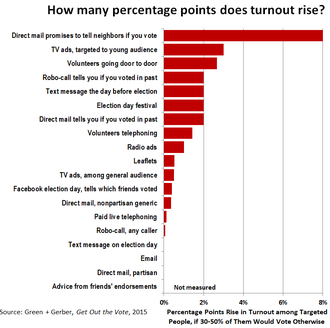

In [24]:
data='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/GOTV.png/330px-GOTV.png'
display(Image(data=data, format='png', embed=True, width=550, height=550))

The most effective solution seems to be sending mail to one's neighbour telling them if you voted. Another relevant solution in Italy would be to allow voting by post, which is currently only available to Italian citizens that live abroad but not to people that moved city for study purposes for example. 

Below, I noted another possible solution that an Italian MP, Carlo Cottarelli (economist and former director of the IMF) proposed. In particular, the bill he is asking to approve would make it compulsory to insert inside the election programmes of the parties the costs of the proposed measures. In this way, citizens can actually verify whether a party's proposals are actually concretisable or not. Further, citizens could navigate more easily the various programmes and could be more informed about the elections.

<blockquote class="twitter-tweet"><p lang="it" dir="ltr">Oggi ho tenuto una conferenza stampa sul mio disegno di legge per richiedere di includere nei programmi elettorali una stima del costo delle misure proposte, delle coperture e dell’effetto sul deficit. Più trasparenza=più credibilità=meno astensionismo. <a href="https://t.co/nzUSPdcVp3">pic.twitter.com/nzUSPdcVp3</a></p>&mdash; Carlo Cottarelli (@CottarelliCPI) <a href="https://twitter.com/CottarelliCPI/status/1626267248808587264?ref_src=twsrc%5Etfw">February 16, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**PLEASE NOTE:** To correctly visualise the following output please install translate, following the [instructions.](https://translate-python.readthedocs.io/en/latest/quickstart/installation.html)

In [25]:
twitter_text = 'Oggi ho tenuto una conferenza stampa sul mio disegno di legge per richiedere di includere nei programmi elettorali una stima del costo delle misure proposte, delle coperture e dell’effetto sul deficit. Più trasparenza=più credibilità=meno astensionismo.'
from translate import Translator
translator= Translator(to_lang="en", from_lang="it")
translation = translator.translate(twitter_text)
print(translation)

Today I held a press conference on my bill to request that an estimate of the cost of the proposed measures, the coverage and the effect on the deficit be included in the electoral programs. More transparency=more credibility=less abstention.


# Conclusion
The recent Italian elections have shown a decreasing trend in turnout. Although the forecasts predict a similar falling trend for the next years, there are some possible solutions that politcians can enact to increase electoral participation. Clearly, analysing closely the causes of this issue could be the first step to tackle low turnout.

> _People often say, with pride, 'I'm not intereseted in politics.' They might as well say, ' I'm not intereted in my standard of living, my health, my job, my rights, my freedoms, my future or any future.' ... If we mean to keep any control over our world and lives, we must be interested in politics._ -- Martha Gellhorn (US war journalist and writer)

## Bibliography
Italian general elections. (2023, February 12). In Wikipedia. https://en.wikipedia.org/wiki/Italian_general_elections

Voter turnout. (2023, January 28). In Wikipedia. https://en.wikipedia.org/wiki/Voter_turnout

Allaby, E. (2022, June 17). INTERVIEW: What’s behind the decline in Italian voter turnout? Retrieved February 23, 2023, from The Local Italy website: https://www.thelocal.it/20220617/interview-whats-driving-the-decline-in-italian-voter-turnout/
